# Photon Survival Probability: \( P_{\gamma\gamma} = 1 - P_{a\gamma} \)

We compute the photon survival probability due to photon-ALP mixing in a magnetic field, assuming natural units (\( \hbar = c = 1 \)).

---

## Formula

The conversion probability \( P_{a\gamma} \) is:

$
P_{a\gamma} = \frac{1}{4} \left( \frac{2g_{a\gamma} B_T E}{\Delta_{\text{osc}}^2} \right)^2 \sin^2\left( \frac{\Delta_{\text{osc}} s}{2} \right)
$

Where:
- $ B_T = B \sin\theta $ is the transverse magnetic field
- $ \Delta_{\text{osc}}^2 = \left( \frac{m_a^2}{2E} \right)^2 + (g_{a\gamma} B_T)^2 $

---

## Parameters

- Magnetic field: $ B = 10^{-9} \, \text{G} $
- Domain size: $s = 1 \, \text{Mpc} $
- ALP mass: $ m_a = 1 \, \text{neV} $
- Coupling: $ g_{a\gamma} = 10^{-11} \, \text{GeV}^{-1} $
- Photon energy range: $ 100 \, \text{GeV} \to 100 \, \text{TeV} $
- Mixing angles:  $ \theta = 15^\circ, 45^\circ, 75^\circ $

---


   

theta = 15, max Δ_osc⋅s/2 = 1.95e+02
theta = 45, max Δ_osc⋅s/2 = 1.95e+02
theta = 75, max Δ_osc⋅s/2 = 1.95e+02


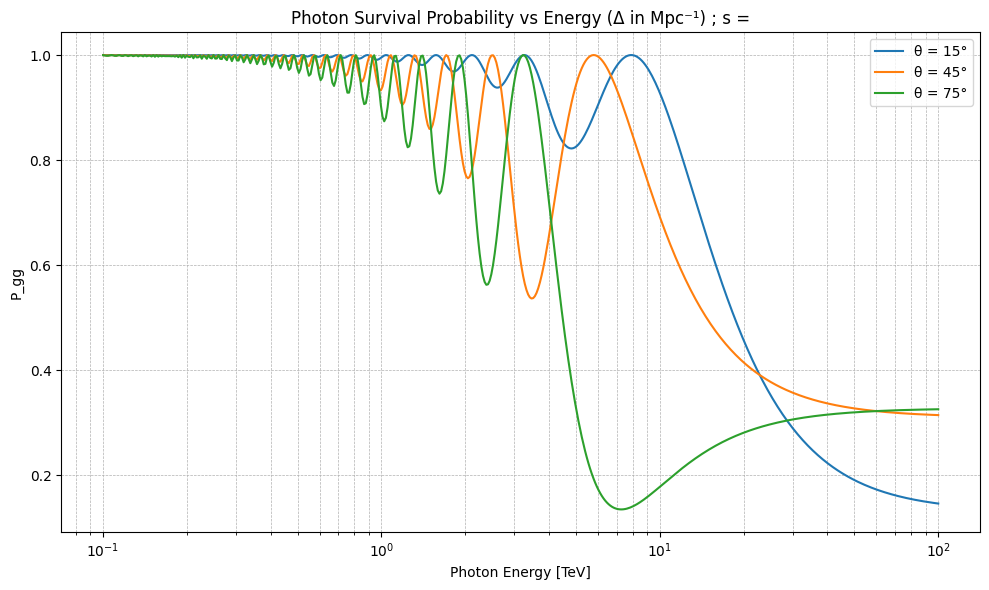

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import giga, tera, electron_volt


# Unit conversion: 1 eV = 1.5637e-29 Mpc^-1
eV_to_Mpc_inv = 1.5637e-29

# Parameters
B = 1e-9                    # B in Gauss

s = 500                       # s in Mpc (keep in Mpc)
m_a = 1e-9                    # m_a in eV
g_ag = 1e-11           # g_ag in GeV^-1

# Energy range: 100 GeV to 100 TeV = 0.1 to 100 TeV
E_vals_TeV = np.logspace(-1, 2, 500)  # from 0.1 TeV to 100 TeV

# Angles in degrees and radians
thetas_deg = [15, 45, 75]
thetas_rad = [np.radians(t) for t in thetas_deg]

plt.figure(figsize=(10, 6))

for theta in thetas_rad:
    B_T = B * np.sin(theta)                          # in G
    
    
    # Δ_B in Mpc^-1 
    delta_B = -1.5e-2 * (g_ag / 1e-11) * (B_T / 1e-9)  # scalar

    # Δ_a in Mpc^-1 (array over energy)
    delta_a = 7.8e-4 * (m_a / 1e-10)**2 * (1 / E_vals_TeV)  # array

    delta_osc = np.sqrt(delta_a**2 + 4*delta_B**2)
    print(f"theta = {np.degrees(theta):.0f}, max Δ_osc⋅s/2 = {np.max(0.5 * delta_osc * s):.2e}")

    P_ag = (2 * delta_B / delta_osc)**2 * np.sin(0.5 * delta_osc * s)**2
    P_gg = 1 - P_ag

    plt.plot(E_vals_TeV , P_gg, label=f'θ = {np.degrees(theta):.0f}°')  #TeV

# Plotting
plt.xscale('log')
plt.xlabel('Photon Energy [TeV]')
plt.ylabel('P_gg')
plt.title('Photon Survival Probability vs Energy (Δ in Mpc⁻¹) ; s =')
plt.legend()
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.tight_layout()
plt.show()

In [5]:
# Unit conversions
eV_to_GeV = 1e-6
neV_to_GeV = 1e-9 * 1e-9
G_to_GeV2 = 1.95e-2  # 1 Gauss ≈ 1.95e-2 GeV²
G_to_GeV2 = 1.95e-2   # 1 Gauss = 1.95e-2 GeV²
Mpc_to_eVinv = 1.5637e38  # 1 Mpc = 1.5637e38 eV⁻¹ (natural units)


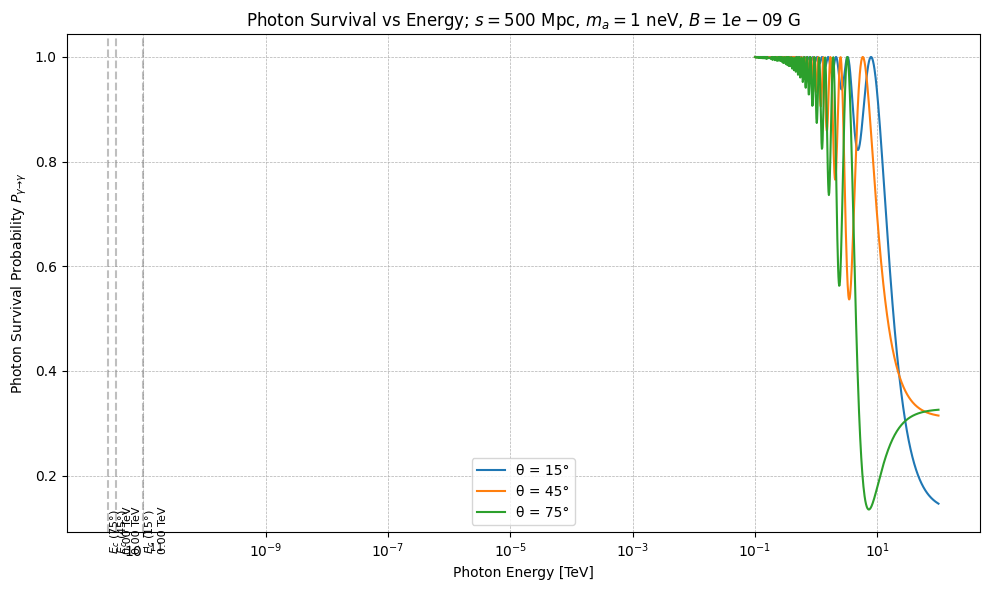

In [6]:
# Energy range (in TeV)
E_vals_TeV = np.logspace(-1, 2, 500)  # 0.1 to 100 TeV
E_vals_GeV = E_vals_TeV * 1e3         # for calculation in GeV
# Angles (degrees and radians)
thetas_deg = [15, 45, 75]
thetas_rad = [np.radians(t) for t in thetas_deg]

plt.figure(figsize=(10, 6))

for theta, theta_deg in zip(thetas_rad, thetas_deg):
    B_T = B * np.sin(theta)                      # B_T in Gauss
    B_T_GeV2 = B_T * G_to_GeV2                   # B_T in GeV²

    # Δ_B and Δ_a in Mpc^-1 (approximate formulas from literature)
    delta_B = -1.5e-2 * (g_ag / 1e-11) * (B_T / 1e-9)            # scalar
    delta_a = 7.8e-4 * (m_a / 1e-10)**2 / E_vals_TeV             # array over E

    # Δ_osc
    delta_osc = np.sqrt(delta_a**2 + 4 * delta_B**2)

    # Conversion probability
    P_ag = (2 * delta_B / delta_osc)**2 * np.sin(0.5 * delta_osc * s)**2
    P_gg = 1 - P_ag

    # Plot photon survival probability
    plt.plot(E_vals_TeV, P_gg, label=f'θ = {theta_deg}°')

    
    # Plot E_c line
    plt.axvline(E_c_TeV, color='gray', linestyle='--', alpha=0.5)
    plt.text(E_c_TeV, 0.05, f'$E_c$ ({theta_deg}°)\n{E_c_TeV:.2f} TeV',
             rotation=90, verticalalignment='bottom', fontsize=8)

# Plot settings
plt.xscale('log')
plt.xlabel('Photon Energy [TeV]')
plt.ylabel(r'Photon Survival Probability $P_{\gamma \to \gamma}$')
plt.title(f'Photon Survival vs Energy; $s = {s}$ Mpc, $m_a = {m_a*1e9:.0f}$ neV, $B = {B:.0e}$ G')
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()

0.009906931551682754
0.003626188621469475
0.002654554308743803


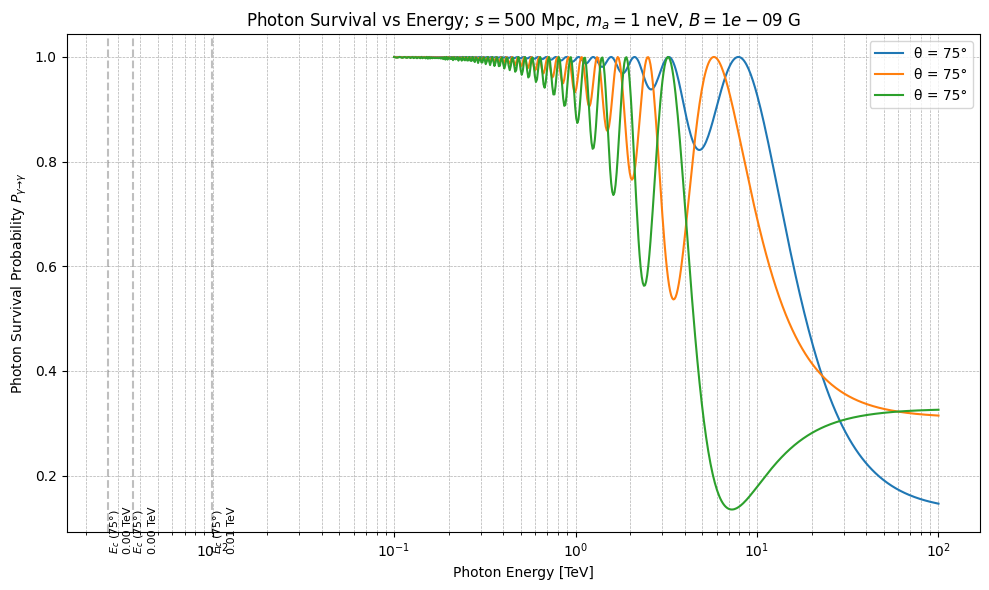

In [13]:
plt.figure(figsize=(10, 6))

for theta in thetas_rad:

# Compute critical energy E_c = m² / (2 g B_T)
    m_a_GeV = m_a * eV_to_GeV
    E_c_GeV = m_a_GeV**2 / (2 * g_ag * B_T_GeV2)
    E_c_TeV = E_c_GeV / 1e3
# Δ_B and Δ_a in Mpc⁻¹ (approx. expressions)

    B_T = B * np.sin(theta)                 # Transverse B field in Gauss
    B_T_GeV2 = B_T * G_to_GeV2              # Convert to GeV²

    delta_B = -1.5e-2 * (g_ag / 1e-11) * (B_T / 1e-9)      # scalar
    delta_a = 7.8e-4 * (m_a / 1e-10)**2 / E_vals_TeV       # vector

    delta_osc = np.sqrt(delta_a**2 + 4 * delta_B**2)

    # Conversion probability P(γ→a), so P(γ→γ) = 1 - P_ag
    P_ag = (2 * delta_B / delta_osc)**2 * np.sin(0.5 * delta_osc * s)**2
    P_gg = 1 - P_ag

    # Plot
    plt.plot(E_vals_TeV, P_gg, label=f'θ = {theta_deg}°')

    m_GeV = m_a * 1e-9            # Convert eV to GeV
    m2_GeV2 = m_GeV**2
    E_c_GeV = m2_GeV2 / (2 * g_ag * B_T_GeV2)
    E_c_TeV = E_c_GeV / 1e-12 
    
    print(E_c_TeV)
    plt.axvline(E_c_TeV, color='gray', linestyle='--', alpha=0.5)
    plt.text(E_c_TeV, 0.05, f'$E_c$ ({theta_deg}°)\n{E_c_TeV:.2f} TeV',
             rotation=90, verticalalignment='bottom', fontsize=8)
plt.xscale('log')
plt.xlabel('Photon Energy [TeV]')
plt.ylabel(r'Photon Survival Probability $P_{\gamma \to \gamma}$')
plt.title(f'Photon Survival vs Energy; $s = {s}$ Mpc, $m_a = {m_a*1e9:.0f}$ neV, $B = {B:.0e}$ G')
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()